# Solution Exponential Integrate and Fire Neuron
## Versione con correzioni in 3.1 answer, 3.2 answer e 4.2 prima parte terzo grafico
## (cerca CORREZIONE per trovarle subito tutte e tre)

first name: Camilla

last name: Giaccari

sciper: 306085

date: 21/03/19

*Your teammate*

first name of your teammate: Marco Pietro

last name of your teammate: Abrate

sciper of your teammate: 292996


** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex1_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

Exercise instructions are given in this notebook file.

** Rules: **

1) You are strongly encouraged to work in groups of 2. You are allowed to work alone. Groups of 3 or more are NOT allowed

2) If you work in a group of 2, BOTH people should upload the same notebook file  

3) If you work alone, you can't share your notebook file with anyone else

4) Discussion between groups is encouraged, but you can't share your code or text

5) The points assigned to each exercise are indicated in the notebook file

6) You should upload a jupyter notebook file with all code run and picture visible. We are not going to run your notebook.

7) Read carefully the instructions at the beginning of the notebook file, answer in a clear and concise way to open questions

8) You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester

# Ex. 3 The Exponential Integrate-and-Fire model

The module [exponential_integrate_fire.exp_IF](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html#module-neurodynex.exponential_integrate_fire.exp_IF) implements the dynamics given in the book [(equation 5.6)](https://neuronaldynamics.epfl.ch/online/Ch5.S2.html).

To get started, use the following code. It follows a common pattern used in these exercises: use the input_factory to get a specific current, inject it into the neuron model we provide, and finally use the plot_tools to visualize the state variables:

nr of spikes: 7


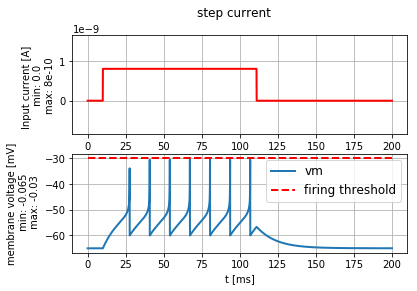

In [2]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=10, t_end=110, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Note that you can change all parameters of the neuron by using the named parameters of the function [`simulate_exponential_IF_neuron()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html#neurodynex.exponential_integrate_fire.exp_IF.simulate_exponential_IF_neuron). If you do not specify any parameter, the default values are used. You can access these variables in your code by prefixing them with the module name (for example `exp_IF.FIRING_THRESHOLD_v_spike`).

## 3.1 Rehobase Threshold [5 points]
The goal of this exercise is to study the minimal current that can elicit a spike and to understand the different notions of a firing threshold. The Exponential-Integrate-and-Fire neuron model has two threshold related parameters. They correspond to the named parameters `v_spike` and `v_rheobase` in the function [`simulate_exponential_IF_neuron()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html#neurodynex.exponential_integrate_fire.exp_IF.simulate_exponential_IF_neuron).


Modify the code example given above: 
- Call `simulate_exponential_IF_neuron()` and set the function parameter `v_spike=+15mV` (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated? [max 2 lines, 1 point]

nr of spikes: 7


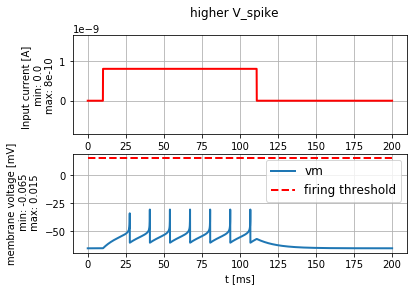

In [3]:
input_current = input_factory.get_step_current(
    t_start=10, t_end=110, unit_time=b2.ms, amplitude=0.8* b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    v_spike=15.*b2.mvolt, I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="higher V_spike", 
    firing_threshold=15.*b2.mvolt)
print("nr of spikes: {}".format(spike_monitor.count[0]))

##### Answer:
V_spike is the maximum voltage that the spikes can reach before being reset to u_rest. Maintaining the current at 0.8nA, the number of spikes will remain the same and the maximum voltage will still be around -30mV. Increasing the current we'll see that the spikes reach higher voltages.

CORREZIONE:
Sono nel regime esponenziale più ripido --> la differenza di 15 considerata è minima --> si può trascurare
(Il fatto che il treshold sia più in alto delle spikes è un errore del plot)

- Call `simulate_exponential_IF_neuron()` and set the function parameter `v_rheobase=-57mV` (which overrides the default value -55mV). What do you expect to happen?  [max 2 lines, 1 point]

nr of spikes: 10


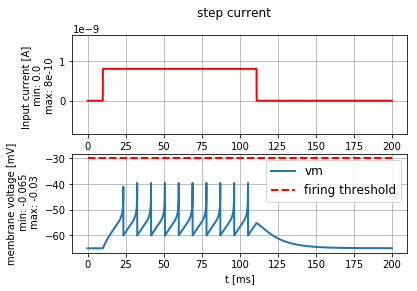

In [4]:
input_current = input_factory.get_step_current(
    t_start=10, t_end=110, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    v_rheobase=-57*b2.mvolt, I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

##### Answer:
The number of spikes increases, but the maximum voltage is lower than -30mV, as can be seen in the plot. Putting a very high v_rehobase (e.g. -20mV), the number of spikes will be zero, since the voltage will never reach the threshold.

Using `v_rheobase=-57mV` for the rest of exercise 3,
- Compute the minimal amplitude `I_rh` of a constant input current such that the neuron will elicit a spike. Insert your answer in the code below. If you are not sure what and how to compute `I_rh`, have a look at Figure 5.1 and the textbox “Rheobase threshold and interpretation of parameters” in the [book](https://neuronaldynamics.epfl.ch/online/Ch5.S2.html).[2 points]
- Validate your result: Modify the code given above and inject a current of amplitude `I_rh` and 300 ms duration into the expIF neuron.[1 points]



In [5]:
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF

# I_rh = (THETArh - Urest - DELTAt) / R
I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh-2*b2.mvolt-exp_IF.V_REST-exp_IF.SHARPNESS_delta_T)/exp_IF.MEMBRANE_RESISTANCE_R
print("I_rh = %s" %I_rh)

I_rh = 300. pA


nr of spikes: 1


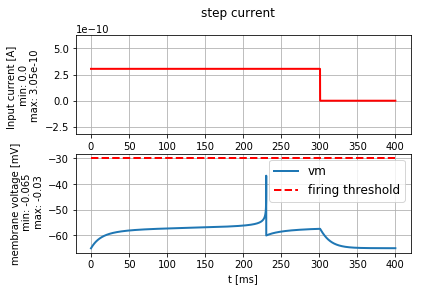

In [6]:
% matplotlib inline
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=0, t_end=300, unit_time=b2.ms, amplitude=I_rh+0.005*b2.nA)
# since 0.3 nA is the minimum current such that we observe a spike,
# we need (0.3+epsilon)nA in order to have a spike. (epsilon = 0.005 nA)
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    v_rheobase=-57*b2.mvolt, I_stim=input_current, simulation_time=400*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.2 Strength - Duration Curve [3+2 points]

The minimal amplitude to elicit a spike depends on the duration of the current. For an infinitely long current, we’ve just calculated the rheobase current. For short pulses and step currents, we can “experimentally” determine the minimal currents. If we plot the amplitude versus duration, we get the strength-duration curve.

Have a look at the following code: for the values `i = 0, 2` and `6` we did not provide the minimal amplitude, but the entries in `min_amp[i]` are set to 0. Complete the min_amp list.

- Set the function parameter `v_rheobase=-57mV` 
- Set the index `i` to 0
- Enter an informed guess into the min_amp table
- Run the script
- Depending on the plot, increase or decrease the amplitude, repeat until you just get one spike.
- Do the same for `i = 2` and `i = 6`


At the end of the script, the strength-duration curve is plotted. Discuss it. You may want to add a log-log plot to better see the asymptotic behaviour.

nr of spikes: 1


Text(0,0.5,'log min amplitude')

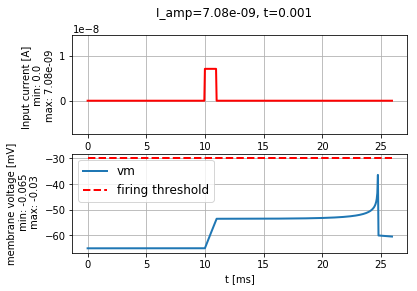

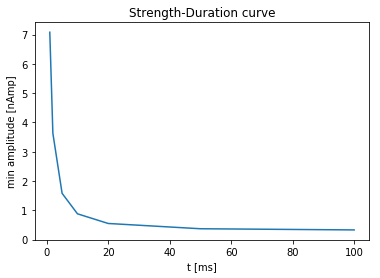

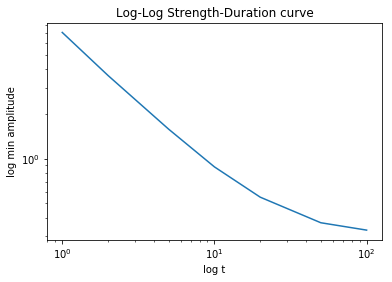

In [7]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

i=0  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [7.08, 3.63, 1.58, 0.88, 0.55, 0.37, 0.33]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+25)*b2.ms,
                                                                    v_rheobase=-57*b2.mvolt)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.figure()
plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

plt.figure()
plt.loglog(durations, min_amp)
plt.title("Log-Log Strength-Duration curve")
plt.xlabel("log t")
plt.ylabel("log min amplitude")

##### Answer:
Inserting the values in the min_amp array, it's clear that the relation between streght and amplitude of the input current is exponential, as it can be seen in the two plots above. It is understandable that shortening the duration of the current requires much higher amplitude to reack the spike threshold.

CORREZIONE:
Non si tratta di una relazione espoenziale (e^x), ma di potenza (x^a). In un caso esponenziale il grafico linear-log sarebbe una linea retta, non il grafico log-log

# Ex. 4. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.adex_model.html#neurodynex.adex_model.AdEx.simulate_AdEx_neuron) to run the model for different input currents and different parameters. Get started by running the following script:

nr of spikes: 10


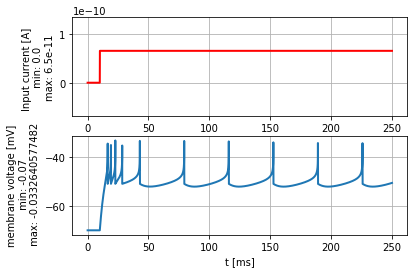

In [8]:
% matplotlib inline
import brian2 as b2
from neurodynex.adex_model import AdEx
from neurodynex.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=250 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
# AdEx.plot_adex_state(state_monitor)

## 4.1. Exercise: Adaptation and firing patterns [7 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

##### Answer:
Setting the model with default parameters we have an initial burst as initiation phase (firing pattern right after the onset of the current step) and a tonic steady-state pattern. It might also be interpreted as a strongly adapting behaviour.

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. [3 points]

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

nr of spikes: 16


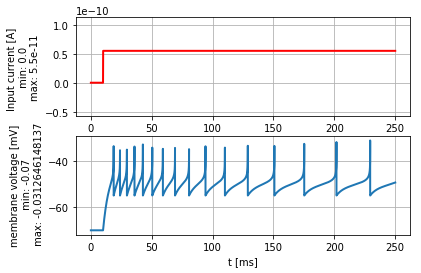

In [9]:
# adapting firing pattern
# a small, voltage reset low
# b big, time scale low -> tonic
# b small, time scale high -> adapting
current = input_factory.get_step_current(10, 250, 1. * b2.ms, 55 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    v_reset=-55*b2.mV, b=1.5*b2.pA, tau_w=150*b2.ms, simulation_time=250 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 17


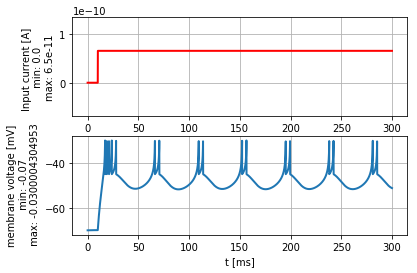

In [10]:
# bursting firing pattern
# b big, time scale low -> tonic
# b small, time scale high -> adapting
# u_reset big -> bursting (if tau_w is small -> b big)
current = input_factory.get_step_current(10, 300, 1. * b2.ms, 65 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    delta_T=5*b2.mV, tau_m=5*b2.ms, v_reset=-45*b2.mV, a=-0.5*b2.nS, b=10*b2.pA, simulation_time=300 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 33


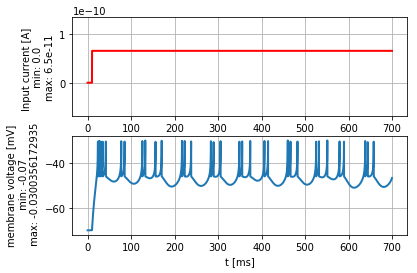

In [11]:
# irregular firing pattern
# a small, negative, u_reset high
# isn't it too similar to bursting? no, increasing delta_T, the behaviour is clearly irregular
current = input_factory.get_step_current(10, 700, 1. * b2.ms, 65 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    delta_T=3.5*b2.mV, tau_m=9.9*b2.ms, v_reset=-46*b2.mV, a=-0.5*b2.nS, b=10*b2.pA, simulation_time=700 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

- In order to better understand the dynamics, it is useful to observe the joint evolution of `u` and `w` in a phase diagram. Use the function `AdEx.plot_adex_state()` to get more insights. Fig. 6.3 in Chapter 6 Section 2 shows the three trajectories in the phase diagram corresponding to the parameters choices you made in the previous exercise (for adapting, bursting and irregular firing patterns).
- Comment on the difference between the three regimes, on the base of the face place [max 5 lines, 1+2 points]

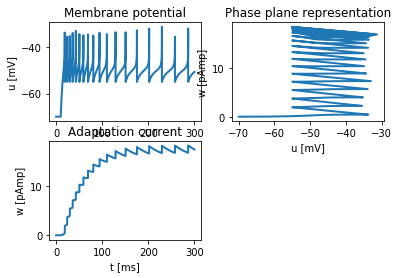

In [12]:
# adapting firing pattern
current = input_factory.get_step_current(10, 300, 1. * b2.ms, 55 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    v_reset=-55*b2.mV, b=1.5*b2.pA, tau_w=150*b2.ms, simulation_time=300 * b2.ms)
AdEx.plot_adex_state(state_monitor)

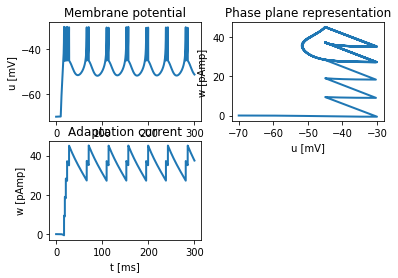

In [13]:
# bursting firing pattern
current = input_factory.get_step_current(10, 300, 1. * b2.ms, 65 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    delta_T=5*b2.mV, tau_m=5*b2.ms, v_reset=-45*b2.mV, a=-0.5*b2.nS, b=10*b2.pA, simulation_time=300 * b2.ms)
AdEx.plot_adex_state(state_monitor)

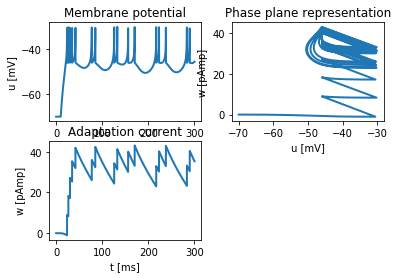

In [14]:
# irregular firing pattern
current = input_factory.get_step_current(10, 300, 1. * b2.ms, 65 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    delta_T=3.5*b2.mV, tau_m=9.9*b2.ms, v_reset=-46*b2.mV, a=-0.5*b2.nS, b=10*b2.pA, simulation_time=300 * b2.ms)
AdEx.plot_adex_state(state_monitor)

##### Answer:
<i><b>Adapting pattern phase plane:</b></i> at the reset, the voltage returns (after an action potential) to increasing points (in w, not evenly spaced), but always below the <i>u-nullcline</i>, so that the membrane potential immediately increase towards the next spike, without detours.

<i><b>Bursting pattern phase plane:</b></i> at the reset, the voltage returns to increasing points (in w), eventually going above the <i>u-nullcline</i>, yielding a trajectory that travels below at least one of the previous resets. The routine steadily continues over time (see adaptation current plot).

<i><b>Irregular pattern phase plane:</b></i> at the reset, the voltage returns to increasing points (in w), eventually going above the <i>u-nullcline</i>. The trajectory is NOT steadily repeated over time (see adaptation current plot), yielding to an irregular pattern.

## 4.2. Exercise: phase plane and nullclines [8 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- How do the nullclines change with respect to `a`?
- How do the nullclines change if a constant current `I(t) = c` is applied?
- What is the interpretation of parameter `b`?
- How do flow arrows change as tau_w gets bigger?

[max 10 lines, 4 points]

##### Answer:
<i><b>How do the nullclines change with respect to a?</b></i> The w-nullcline is a straight line with a slope tuned by the parameter a (if a=0, then the w-nullcline is horizontal).

<i><b>How do the nullclines change if a constant current I(t) = c is applied?</b></i> Upon current injection, the u-nullcline is shifted vertically (upwards if the current is positive and downwards if the current is negative) by an amount proportional to the magnitude of the current.

<i><b>What is the interpretation of parameter b?</b></i> Each time the voltage reaches the reset threshold, it is reinitialized at the reset value u_reset, while the adaptation variable is shifted upwards by an amount b, compared with the value w just before the reset. Namely, b is the jump of the spike-triggered current.

<i><b>How do flow arrows change as tau_w gets bigger?</b></i> Tau_w is the decaying time scale of the spike-triggered current. If it is small, then the decay is fast and the arrows above the u-nullcline are more perpendicular to the abscissa. If it gets bigger, the spike-triggered current decays on a long time scale and it can accumulate over several spikes and therefore decrease the net driving current I-w, which would lead to an adapting pattern of the membrane potential. In this case the arrows above the u-nullcline are more parallel to the abscissa.

What would be the firing pattern if `a` is small (in the order of `0.01 nS`) ? To answer this, simulate the following 2 conditions [2 points] and write a short answer [max 5 lines, 2 points]:

- A large jump `b` and a large time scale `tau_w`.
- A small jump `b` and a small time scale `tau_w`.

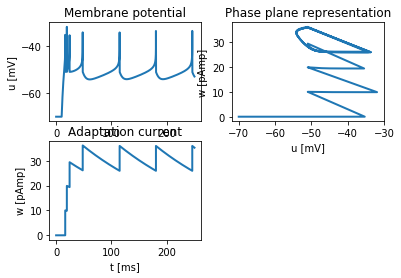

In [15]:
# A large jump b and a large time scale tau_w.
current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    v_reset=-51*b2.mV, a=0.01*b2.nS, b=10*b2.pA, tau_w=200*b2.ms, simulation_time=250 * b2.ms)
AdEx.plot_adex_state(state_monitor)

#CORREZIONE#
#b=10 è troppo piccolo, in tabella 6.1 del libro il suo massimo è 60, in figura 6.6 del libro arriva fino a 200#
#il terzo grafico è quindi sbagliato, basta mettere un valore di b tra 60 e 200 per correggerlo#

nr of spikes: 43


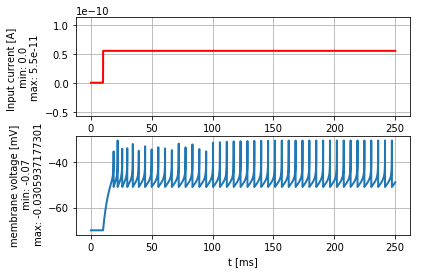

In [16]:
# A small jump b and a small time scale tau_w.
current = input_factory.get_step_current(10, 250, 1. * b2.ms, 55 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current,
    v_reset=-51*b2.mV, a=0.01*b2.nS, b=3*b2.pA, tau_w=20*b2.ms, simulation_time=250 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

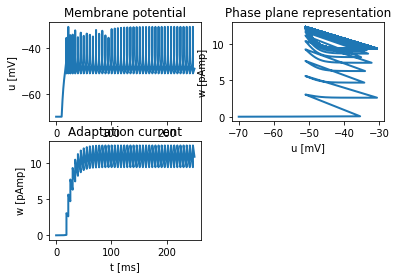

In [17]:
AdEx.plot_adex_state(state_monitor)

##### Answer:

Since a is almost zero, the w-nullcline is horizontal.

<b><i>A large jump b and a large time scale tau_w:</i></b> As it can be seen in the plots, a large jump would shift the adaptation current by a large amount every spike and a large time scale tau_w would make the detour longer. The combination of the two would lead to a tonic firing pattern with initial bursting.

<b><i>A small jump b and a small time scale tau_w:</i></b> As it can be seen in the plots, a small jump would shift the adaptation current by a small amount every spike and a small time scale tau_w would make the detour shorter. The combination of the two would still lead to a tonic, without initial bursting because of b.

Since tau_w is big in the first plot, the membrane potential spikes much less than the second simulation (in the same time window), where tau_w is indeed small.

### Additional material:

To learn more about the variety of patterns the relatively simple neuron model can reproduce, have a look the following publication: [Naud, R., Marcille, N., Clopath, C., Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological cybernetics, 99(4-5), 335-347.](https://link.springer.com/article/10.1007/s00422-008-0264-7)